In [ ]:
#Importing Libraries for data preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Activation,Dropout, BatchNormalization, Input
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import LSTM,Dropout,Dense

In [ ]:
#6,1
df=pd.read_csv("/content/NFLX.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       778 non-null    object 
 1   Open       778 non-null    float64
 2   High       778 non-null    float64
 3   Low        778 non-null    float64
 4   Close      778 non-null    float64
 5   Adj Close  778 non-null    float64
 6   Volume     778 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 42.7+ KB


In [ ]:
close = df["Open"]

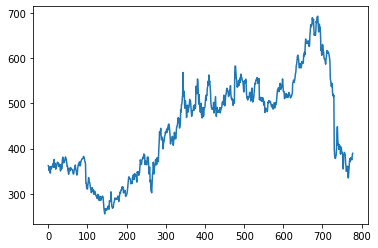

In [ ]:
plt.plot(close)

In [ ]:
scaling=MinMaxScaler(feature_range=(0,1))
d_close=scaling.fit_transform(np.array(close).reshape(-1,1))

In [ ]:
training_size=int(len(d_close)*0.75)
test_size=len(d_close)-training_size
train_data,test_data=d_close[0:training_size,:],d_close[training_size:len(d_close),:1]

In [ ]:
training_size , test_size

(583, 195)

In [ ]:

# convert an array of values into a dataset matrix
def create_data(dataset, time_step=1):
	dX, dY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dX.append(a)
		dY.append(dataset[i + time_step, 0])
	return np.array(dX), np.array(dY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 20
x_train, y_train = create_data(train_data, time_step)
x_test, y_test = create_data(test_data, time_step)

In [ ]:
x_train[0] , y_train[0]

(array([0.24402256, 0.23820539, 0.21928818, 0.22418928, 0.23921309,
        0.20621106, 0.22052492, 0.2374038 , 0.22925064, 0.23999176,
        0.24118264, 0.24450348, 0.25350402, 0.23635032, 0.27090968,
        0.27537563, 0.23655643, 0.25687064, 0.24113686, 0.22622753]),
 0.2323424427505858)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [ ]:
#6.2
#lstm model
model = Sequential()
model.add(LSTM(50, activation= 'relu', input_shape = (20,1)))
model.add(Dense(1))
model.compile(optimizer= 'adam', loss = 'mse')

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=20,verbose=1)

Epoch 1/10
29/29 [==============================] - 2s 20ms/step - loss: 0.0657 - val_loss: 0.0385
Epoch 2/10
29/29 [==============================] - 0s 10ms/step - loss: 0.0053 - val_loss: 0.0066
Epoch 3/10
29/29 [==============================] - 0s 10ms/step - loss: 0.0021 - val_loss: 0.0102
Epoch 4/10
29/29 [==============================] - 0s 10ms/step - loss: 0.0020 - val_loss: 0.0089
Epoch 5/10
29/29 [==============================] - 0s 11ms/step - loss: 0.0018 - val_loss: 0.0066
Epoch 6/10
29/29 [==============================] - 0s 10ms/step - loss: 0.0017 - val_loss: 0.0069
Epoch 7/10
29/29 [==============================] - 0s 10ms/step - loss: 0.0016 - val_loss: 0.0057
Epoch 8/10
29/29 [==============================] - 0s 10ms/step - loss: 0.0015 - val_loss: 0.0062
Epoch 9/10
29/29 [==============================] - 0s 10ms/step - loss: 0.0015 - val_loss: 0.0043
Epoch 10/10
29/29 [==============================] - 0s 10ms/step - loss: 0.0015 - val_loss: 0.0038


In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
#Error calculation of the model
print("Train data - MSE : ",round(math.sqrt(mean_squared_error(y_train,train_predict)),4))
print("Test data - MSE : ",round(math.sqrt(mean_squared_error(y_test,test_predict)),4))

Train data - MSE :  0.0375
Test data - MSE :  0.0613


In [ ]:
train_predict=scaling.inverse_transform(train_predict)
test_predict=scaling.inverse_transform(test_predict)

In [ ]:
real_stock=y_test.reshape(-1,1)
real_stock.shape , test_predict.shape
real_stock=scaling.inverse_transform(real_stock)

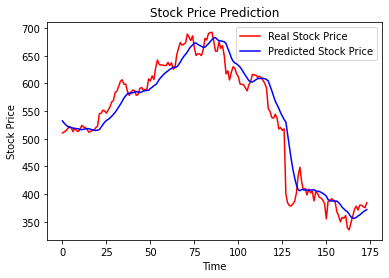

In [ ]:
# Visualising the results
plt.plot(real_stock, color = 'red', label = 'Real Stock Price')
plt.plot(test_predict, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
real_stock_train=y_train.reshape(-1,1)
real_stock_train=scaling.inverse_transform(real_stock_train)

In [ ]:
real_stock_train.shape , train_predict.shape

((562, 1), (562, 1))

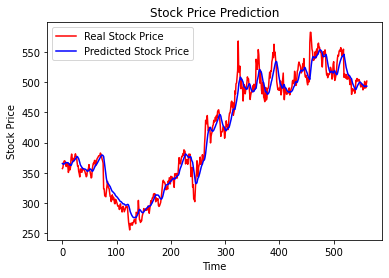

In [ ]:
plt.plot(real_stock_train, color = 'red', label = 'Real Stock Price')
plt.plot(train_predict, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
#7,1
#create five stacked LSTM layer
lstm_model=Sequential()

#Input layer with 20 and Hidden layer - 1 with 20 neurons
lstm_model.add(LSTM(20,return_sequences=True,input_shape=(20,1)))
lstm_model.add(Dropout(0.2))

#Hidden layer - 2 with 40 neurons
lstm_model.add(LSTM(40,return_sequences=True))
lstm_model.add(Dropout(0.2))

#Hidden layer - 3 with 50 neurons
lstm_model.add(LSTM(50,return_sequences=True))
lstm_model.add(Dropout(0.2))

#Hidden layer - 4 with 70 neurons
lstm_model.add(LSTM(70,return_sequences=True))
lstm_model.add(Dropout(0.2))

#Hidden layer - 5 with 80 neurons
lstm_model.add(LSTM(80))
lstm_model.add(Dropout(0.2))

#Output layer
lstm_model.add(Dense(1))

#model compile
lstm_model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=20,verbose=1)

Epoch 1/20
29/29 [==============================] - 0s 11ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 2/20
29/29 [==============================] - 0s 9ms/step - loss: 8.8936e-04 - val_loss: 0.0021
Epoch 3/20
29/29 [==============================] - 0s 9ms/step - loss: 8.9379e-04 - val_loss: 0.0024
Epoch 4/20
29/29 [==============================] - 0s 11ms/step - loss: 9.3842e-04 - val_loss: 0.0030
Epoch 5/20
29/29 [==============================] - 0s 10ms/step - loss: 8.5128e-04 - val_loss: 0.0018
Epoch 6/20
29/29 [==============================] - 0s 11ms/step - loss: 8.4451e-04 - val_loss: 0.0021
Epoch 7/20
29/29 [==============================] - 0s 10ms/step - loss: 8.4906e-04 - val_loss: 0.0026
Epoch 8/20
29/29 [==============================] - 0s 11ms/step - loss: 8.1842e-04 - val_loss: 0.0016
Epoch 9/20
29/29 [==============================] - 0s 10ms/step - loss: 8.4899e-04 - val_loss: 0.0018
Epoch 10/20
29/29 [==============================] - 0s 11ms/step - loss: 8.970

In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [ ]:
#Error calculation of the model
print("Train data - MSE : ",round(math.sqrt(mean_squared_error(y_train,train_predict)),4))
print("Test data - MSE : ",round(math.sqrt(mean_squared_error(y_test,test_predict)),4))

Train data - MSE :  0.0265
Test data - MSE :  0.0443


In [ ]:
train_predict=scaling.inverse_transform(train_predict)
test_predict=scaling.inverse_transform(test_predict)

In [ ]:
real_stock=y_test.reshape(-1,1)
real_stock.shape , test_predict.shape
real_stock=scaling.inverse_transform(real_stock)

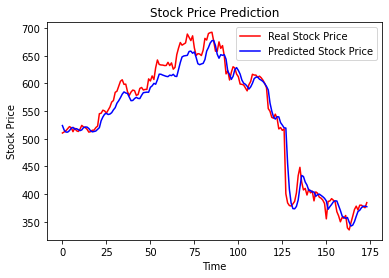

In [ ]:
# Visualising the results
plt.plot(real_stock, color = 'red', label = 'Real Stock Price')
plt.plot(test_predict, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
real_stock_train=y_train.reshape(-1,1)
real_stock_train=scaling.inverse_transform(real_stock_train)

In [ ]:
real_stock_train.shape , train_predict.shape

((562, 1), (562, 1))

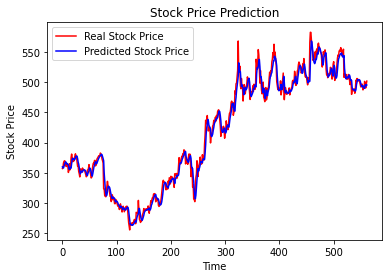

In [ ]:
plt.plot(real_stock_train, color = 'red', label = 'Real Stock Price')
plt.plot(train_predict, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
#7,2
from keras.layers import Bidirectional
modell = Sequential()
modell.add(Bidirectional(LSTM(100, activation='relu', input_shape=(20,1)))) #elu
#modell.add(Bidirectional(LSTM(50, dropout=0.5)))

#modell.add(Bidirectional(LSTM(100, dropout=0.5)))
#modell.add(BatchNormalization(momentum=0.6))
modell.add(Dense(1))
modell.compile(loss='mean_squared_error', optimizer='adam') #rmsprop adam


In [ ]:
modell.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=20,verbose=1)

Epoch 1/10
29/29 [==============================] - 3s 38ms/step - loss: 0.0431 - val_loss: 0.0167
Epoch 2/10
29/29 [==============================] - 1s 24ms/step - loss: 0.0036 - val_loss: 0.0113
Epoch 3/10
29/29 [==============================] - 1s 24ms/step - loss: 0.0023 - val_loss: 0.0093
Epoch 4/10
29/29 [==============================] - 1s 22ms/step - loss: 0.0024 - val_loss: 0.0074
Epoch 5/10
29/29 [==============================] - 1s 23ms/step - loss: 0.0021 - val_loss: 0.0076
Epoch 6/10
29/29 [==============================] - 1s 23ms/step - loss: 0.0020 - val_loss: 0.0064
Epoch 7/10
29/29 [==============================] - 1s 25ms/step - loss: 0.0018 - val_loss: 0.0062
Epoch 8/10
29/29 [==============================] - 1s 26ms/step - loss: 0.0018 - val_loss: 0.0060
Epoch 9/10
29/29 [==============================] - 1s 26ms/step - loss: 0.0018 - val_loss: 0.0051
Epoch 10/10
29/29 [==============================] - 1s 26ms/step - loss: 0.0017 - val_loss: 0.0043


In [ ]:
train_predict=modell.predict(x_train)
test_predict=modell.predict(x_test)

In [ ]:

#Error calculation of the model
print("Train data - MSE : ",round(math.sqrt(mean_squared_error(y_train,train_predict)),4))
print("Test data - MSE : ",round(math.sqrt(mean_squared_error(y_test,test_predict)),4))

Train data - MSE :  0.0418
Test data - MSE :  0.0656


In [ ]:
train_predict=scaling.inverse_transform(train_predict)
test_predict=scaling.inverse_transform(test_predict)

In [ ]:
real_stock=y_test.reshape(-1,1)
real_stock.shape , test_predict.shape
real_stock=scaling.inverse_transform(real_stock)

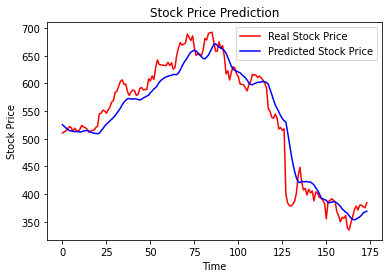

In [ ]:
# Visualising the results
plt.plot(real_stock, color = 'red', label = 'Real Stock Price')
plt.plot(test_predict, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
real_stock_train=y_train.reshape(-1,1)
real_stock_train=scaling.inverse_transform(real_stock_train)

In [ ]:
real_stock_train.shape , train_predict.shape

((562, 1), (562, 1))

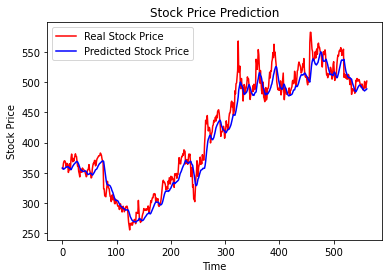

In [ ]:
plt.plot(real_stock_train, color = 'red', label = 'Real Stock Price')
plt.plot(train_predict, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

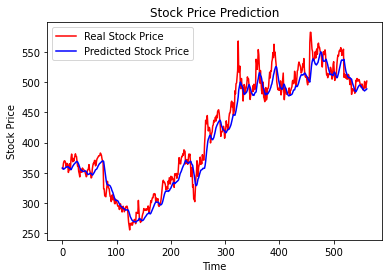

In [ ]:
plt.plot(real_stock_train, color = 'red', label = 'Real Stock Price')
plt.plot(train_predict, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()